In [61]:
# Generate 2D Gabor filter

import numpy as np
import pylab
import cv2
import math
def Gabor(sigma, theta, Lambda, psi, gamma): # different with Gabor filter
    """Gabor feature extraction."""
    sigma_x = sigma
    sigma_y = float(sigma) / gamma

    # Bounding box
    nstds = 3  # Number of standard deviation sigma
    xmax = max(abs(nstds * sigma_x * np.cos(theta)), abs(nstds * sigma_y * np.sin(theta)))
    xmax = np.ceil(max(1, xmax))
    ymax = max(abs(nstds * sigma_x * np.sin(theta)), abs(nstds * sigma_y * np.cos(theta)))
    ymax = np.ceil(max(1, ymax))
    xmin = -xmax
    ymin = -ymax
    (y, x) = np.meshgrid(np.arange(ymin, ymax + 1), np.arange(xmin, xmax + 1))

    # Rotation
    # Modulating function M: an oriented sinusoidal function
    x_theta = x * np.cos(theta) + y * np.sin(theta)
    y_theta = -x * np.sin(theta) + y * np.cos(theta)
    # Real part
    gb_real = np.exp(-.5 * (x_theta ** 2 / sigma_x ** 2 + y_theta ** 2 / sigma_y ** 2)) * np.cos(2 * np.pi / Lambda * x_theta + psi)
    # Imaginary Part
    gb_im = np.exp(-.5 * (x_theta ** 2 / sigma_x ** 2 + y_theta ** 2 / sigma_y ** 2)) * np.sin(2 * np.pi / Lambda * x_theta + psi)
    return gb


In [62]:
# Generate Ma defined filter: filter_Ma
# The first channel of spatial filters: filter_Ma_1
# For the frequency f, you can assign f as 1/deltaY. 
# You can also set f to 1/deltaX to compare the results.

def filter_Ma_1(theta):
    # delta_x = 3 and delta_y = 1.5 in paper Ma et al
    delta_x = 3
    delta_y = 1.5
    f = 1/delta_x
    # Bounding box
    nstds = 3  # Number of standard deviation sigma
    ## Set x,y using three sigma rule
    xmax = max(abs(nstds * delta_x * np.cos(theta)), abs(nstds * delta_y * np.sin(theta)))
    xmax = np.ceil(max(1, xmax))
    ymax = max(abs(nstds * delta_x * np.sin(theta)), abs(nstds * delta_y * np.cos(theta)))
    ymax = np.ceil(max(1, ymax))
    xmin = -xmax
    ymin = -ymax
    (y, x) = np.meshgrid(np.arange(ymin, ymax + 1), np.arange(xmin, xmax + 1))

    # Modulating function M: a circularly symmetric sinusoidal function
    M = np.cos(2 * np.pi * f * np.sqrt(x ** 2 + y ** 2))
    fm = (1/(2 * np.pi * delta_x * delta_y)) * np.exp(-.5 * ((x / delta_x) ** 2 + (y / delta_y) ** 2)) * M
    return fm

In [63]:
# Generate Ma defined filter: filter_Ma
# The second channel of spatial filters: filter_Ma_2

def filter_Ma_2(theta):
    # delta_x = 4.5 and delta_y = 1.5
    delta_x = 4.5
    delta_y = 1.5
    f = 1/delta_x
    # Bounding box
    nstds = 3  # Number of standard deviation sigma
    xmax = max(abs(nstds * delta_x * np.cos(theta)), abs(nstds * delta_y * np.sin(theta)))
    xmax = np.ceil(max(1, xmax))
    ymax = max(abs(nstds * delta_x * np.sin(theta)), abs(nstds * delta_y * np.cos(theta)))
    ymax = np.ceil(max(1, ymax))
    xmin = -xmax
    ymin = -ymax
    (y, x) = np.meshgrid(np.arange(ymin, ymax + 1), np.arange(xmin, xmax + 1))

    # Modulating function M: a circularly symmetric sinusoidal function
    M = np.cos(2 * np.pi * f * np.sqrt(x ** 2 + y ** 2))
    fm = (1/(2 * np.pi * delta_x * delta_y)) * np.exp(-.5 * ((x / delta_x) ** 2 + (y / delta_y) ** 2)) * M
    return fm

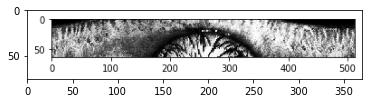

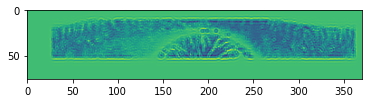

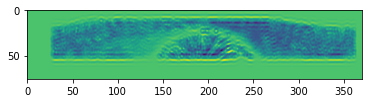

In [74]:
## Convolution

import matplotlib.pyplot as plt
import pylab
import cv2
import numpy as np

img = plt.imread('unnamed.png')
#I=cv2.imread(imagename) # Color image
I=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img)                                   
pylab.show()
# convolution and use f(0,1/delta_x))
# take theta in [0, pi/4, pi/2, 3*pi/4]
# take f in [1/delta_x, 1/de;ta_y]
F_1 = cv2.filter2D(I,-1,filter_Ma_1(0)) # take theta = 0
F_2 = cv2.filter2D(I,-1,filter_Ma_2(0)) # take theta = 0
# picture after convolution
plt.imshow(F_1)
pylab.show()
plt.imshow(F_2)
plt.imsave("F_1.png",F_1)
plt.imsave("F_2.png",F_2)
pylab.show()


In [85]:
F_1  # show the result

array([[ 7.80173841e-18,  7.00829767e-18,  1.13459848e-17, ...,
         2.13545154e-18,  2.72856320e-18,  2.24605200e-18],
       [-1.69406589e-19, -2.30392962e-18, -2.05320786e-18, ...,
        -3.69136958e-18, -4.92634362e-18, -5.42101086e-18],
       [-1.81603864e-18,  6.50521303e-19,  1.30104261e-18, ...,
        -9.24282352e-18, -1.02728156e-17, -6.66784336e-18],
       ...,
       [-2.55691019e-18, -5.66649656e-18, -7.27644977e-18, ...,
         1.64202972e-18,  2.87593783e-18,  2.08769675e-18],
       [ 1.04806213e-18,  2.40468539e-18,  6.34484133e-18, ...,
        -7.90450567e-18, -7.20217060e-18, -6.07573879e-18],
       [-2.58401525e-18, -1.17597631e-18,  1.44112058e-18, ...,
        -2.82994023e-19, -1.18408733e-18, -9.30399415e-19]], dtype=float32)

In [144]:
## 2D filter encode

### receive pictures from preprocessing part
### Here we need to get the size of image I (Iheight, Iwidth)
### I is a gray image
'''
I=cv2.imread(imagename)
I_height, I_width = I.shape
'''

v = []  ## feature vector
# encode filtered image
def filter_encode(imagename, filter): 
    # imagename can be chosen between F1 and F2
    # filter can be chosen in filter_Ma_1 and filter_Ma_2
    # filter_num = 2
    # print(I.shape)
    I_height= imagename.shape[0]
    I_width = imagename.shape[1]

    # filter size: set filter height and width, such as 9*9
    filter_height = 9
    filter_width = 9
    mmax = math.floor(I_height/filter_height)
    nmax = math.floor(I_width/filter_width)
    # for k in range(int(mmax * nmax)):
        
    for m in range(int(mmax)):
        for n in range(int(nmax)):
            # do partition from the image and compute inner product
            part_F = imagename[m*filter_height:(m+1)*filter_height, n*filter_width:(n+1)*filter_width]
            avg = np.mean(part_F)
            sigma = np.mean(part_F - avg)
            v.append(avg)
            v.append(sigma)
            
    print(v)  # feature vector
    # return v

In [145]:
'''
filter_encode(F_1, filter_Ma_1(0))
filter_encode(F_2, filter_Ma_1(0))
'''

[9.322562e-19, 6.637869e-26, -2.881401e-20, 0.0, 2.777166e-07, -5.614165e-15, 1.3004967e-05, 5.3895983e-13, 1.834076e-05, -2.6947991e-13, 3.387828e-05, -6.2878647e-13, 7.425847e-05, -1.7965328e-12, 9.193463e-05, 2.299562e-11, 0.00029920094, -1.7246714e-11, 8.247566e-05, -1.149781e-11, -0.00010684275, 1.149781e-11, 0.0007621007, -2.7307297e-11, 0.0004280381, 2.0121167e-11, 0.00020640164, -1.149781e-11, 0.0004416547, -1.149781e-11, 0.00037835818, -2.299562e-11, 0.0003354173, -2.299562e-11, 0.0006492899, -3.736788e-11, 0.00037470943, 3.449343e-11, 0.00062346173, 2.299562e-11, 0.0008561453, 9.198248e-11, 0.00049214094, 3.449343e-11, 0.00042454145, -1.14978096e-10, 0.00090678514, -6.898686e-11, 0.0007461528, -2.299562e-11, 0.0007973849, -9.198248e-11, 0.00094346446, -6.898686e-11, 0.00048520343, -6.898686e-11, 0.00086395914, -1.6096934e-10, 0.0004542837, -5.7489048e-11, 0.00028808843, -2.8744524e-11, 0.0003519841, 5.7489048e-11, 0.00015400555, 2.8744524e-12, 5.669563e-05, -5.5692517e-12, 4.

'\nm = np.mean()\n\nsigma = np.mean(sum())\n\n[7.8017384e-18 7.0082977e-18 1.1345985e-17 1.2566399e-17 9.2222102e-18\n 7.9416469e-18 8.8313243e-18 8.3999356e-18 8.1889243e-18]\n[3.8626249e-18 6.0703195e-18 8.7445696e-18 1.0128301e-17 1.0484581e-17\n 5.6157639e-18 3.1148553e-18 4.8790293e-18 2.9673510e-18]\n[5.5611001e-18 5.4292041e-18 6.6645623e-18 3.6615390e-18 3.0398854e-18\n 4.6044492e-18 3.3706777e-18 6.4747223e-18 5.0371316e-18]\n[7.09278589e-18 1.05506895e-17 1.26221640e-17 1.09898025e-17\n 8.02873662e-18 7.90694007e-18 1.02024035e-17 4.66063708e-18\n 5.40204733e-18]\n[ 4.5929146e-18  4.0085863e-18  2.1244054e-18 -1.4228511e-19\n  5.9471829e-18  1.0184272e-17  9.6066961e-18  7.8428509e-18\n  9.6933284e-18]\n[8.4215440e-18 8.7711544e-18 1.0596138e-17 7.7239437e-18 2.8193514e-18\n 2.8023308e-18 3.5774619e-18 2.5573292e-18 6.5291194e-18]\n[6.32663260e-18 7.97200527e-18 3.15610142e-18 1.94056179e-18\n 5.26470061e-19 2.37982240e-18 1.08235086e-17 1.16595524e-17\n 1.11223714e-17]\n[1.1